# Learning how to use propulsion models

Import a propulsive model. In this case is a simpified model of a turbo-fan

In [1]:
from propulsion import JetModel
from numpy import radians, array

Left_Engine = JetModel('Left_Engine', Fmaxi = 35e3, nrho = 0.775, rhoi = 0.41271,
                         Vi = 200.0, nv = 0)
Left_Engine.set_position(array([0, -5, 1.42]))
Left_Engine.set_attitude(array([0., radians(0.), 0.]))

Thrust is funcion of air density, so we need an atmopheric model.

In [2]:
from atmosphere import atmosISA
atmos = atmosISA()

### Thust as function of altitude

In [3]:
from numpy import linspace, arange, degrees

In [4]:
hlist = arange(0,12000,10)
Left_Engine.set_delta_p(0.3)
thrust_list = []

In [5]:
for h in hlist:
    atmos.set_altitude(h)
    Left_Engine.set_airDensity(atmos.get_airDensity())
    thrust_list.append(Left_Engine.get_forces()[0])

In [6]:
import matplotlib.pyplot as plt

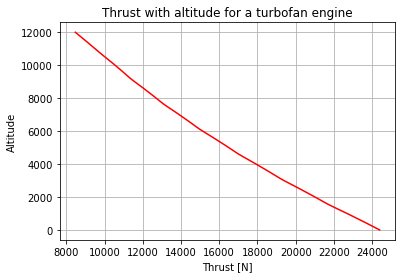

In [7]:
plt.figure()
plt.plot(thrust_list, hlist, color='r', linestyle = '-')
plt.xlabel('Thrust [N]')
plt.ylabel('Altitude')
plt.title('Thrust with altitude for a turbofan engine')
plt.grid()
plt.show()

### Thust as function of altitude and troatle

In [8]:
troatle_list = arange(0,1,0.1)

thrust = []
thrust2 = []
thrust3 = []

h1 = 4000
h2 = 8000
h3 = 12000

In [9]:
atmos._altitude = h1
Left_Engine._rho = atmos._rho

for tr in troatle_list:
    Left_Engine.set_delta_p(tr)
    thrust.append(Left_Engine.get_forces()[0])
    
atmos._altitude = h2
Left_Engine._rho = atmos._rho

for tr in troatle_list:
    Left_Engine.set_delta_p(tr)
    thrust2.append(Left_Engine.get_forces()[0])
    
atmos._altitude = h3
Left_Engine._rho = atmos._rho

for tr in troatle_list:
    Left_Engine.set_delta_p(tr)
    thrust3.append(Left_Engine.get_forces()[0])

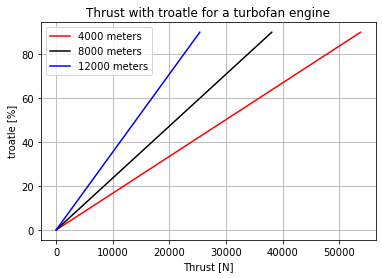

In [10]:
plt.figure()
plt.plot(thrust, troatle_list*100, color='r', label = '4000 meters', linestyle = '-')
plt.plot(thrust2, troatle_list*100, color='k', label = '8000 meters', linestyle = '-')
plt.plot(thrust3, troatle_list*100, color='b', label = '12000 meters', linestyle = '-')

plt.xlabel('Thrust [N]')
plt.ylabel('troatle [%]')
plt.title('Thrust with troatle for a turbofan engine')
plt.legend()
plt.grid()
plt.show()

## Tilted propeller

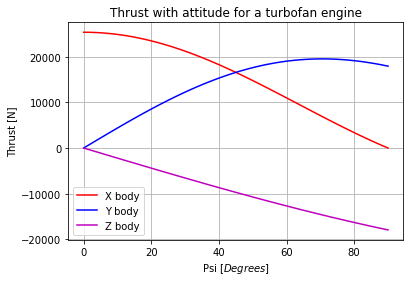

In [11]:
thrustX = []
thrustY = []
thrustZ = []

psi_list = linspace(0, radians(90), 100)
theta_list = linspace(0, radians(45), 100)

for i in range(len(psi_list)):
    theta = theta_list[i]
    psi = psi_list[i]
    Left_Engine.set_attitude(array([0.0, theta, psi]))
    thrustX.append(Left_Engine.get_forces()[0])
    thrustY.append(Left_Engine.get_forces()[1])
    thrustZ.append(Left_Engine.get_forces()[2])

    
plt.figure()
plt.plot(degrees(psi_list), thrustX, color='r', linestyle = '-', label = 'X body')
plt.plot(degrees(psi_list), thrustY, color='b', linestyle = '-', label = 'Y body')
plt.plot(degrees(psi_list), thrustZ, color='m', linestyle = '-', label = 'Z body')

plt.ylabel('Thrust [N]')
plt.xlabel('Psi $[Degrees]$')
plt.title('Thrust with attitude for a turbofan engine')
plt.grid()
plt.legend()
plt.show()